In [1]:
import mido
mid = mido.MidiFile('IMSLP221460-WIMA.2591-BWV_1079_1-Part.mid', clip=True)
#mid.tracks
print(mid.tracks)

[MidiTrack([
  MetaMessage('set_tempo', tempo=500000, time=0),
  MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=0, notated_32nd_notes_per_beat=8, time=0),
  MetaMessage('end_of_track', time=0)]), MidiTrack([
  MetaMessage('track_name', name='Violine', time=0),
  MetaMessage('device_name', name='MIDI: Out To MIDI Yoke:  1', time=0),
  Message('program_change', channel=0, program=40, time=0),
  Message('aftertouch', channel=0, value=97, time=0),
  Message('control_change', channel=0, control=7, value=97, time=0),
  Message('pitchwheel', channel=0, pitch=0, time=0),
  Message('control_change', channel=0, control=11, value=63, time=0),
  Message('note_on', channel=0, note=72, velocity=127, time=0),
  Message('note_off', channel=0, note=72, velocity=64, time=730),
  Message('note_on', channel=0, note=75, velocity=127, time=38),
  Message('note_off', channel=0, note=75, velocity=64, time=730),
  Message('note_on', channel=0, note=79, velocity=127, time=38),
  Mess

In [2]:
import numpy as np
notes = np.zeros(372)
print(notes)
bpm = 0
print(type(mid.tracks[0][0]))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [3]:
tempi = []
for track in mid.tracks:
    for msg in track:
        if msg.type == 'set_tempo':
            tempi.append(msg.tempo)
print(tempi)

[500000]


In [4]:
tempo = tempi[0]
ticks_per_beat = mid.ticks_per_beat
bpm = 60000000/tempo
dt = 60 / (bpm * ticks_per_beat)
print(dt)
print(ticks_per_beat)

0.0013020833333333333
384


[  0.          72.           2.          75.           4.
  79.           6.          80.           8.          71.
  11.          79.          12.          78.          14.
  77.          16.          76.          18.          75.
  21.          74.          22.          73.          23.
  72.          24.          71.          25.          69.
  25.5         67.          26.          72.          27.
  77.          28.          75.          30.          74.
  30.25        75.          30.375       74.          30.5
  75.          30.625       74.          30.75        75.
  30.875       74.          31.          75.          31.125
  74.          31.25        75.          31.375       74.
  31.5         75.          31.625       74.          31.75
  75.          31.875       74.          32.          72.
  33.          84.          34.          78.          35.
  81.          36.          70.          37.          86.
  38.          79.          39.          82.          40.
  75.   

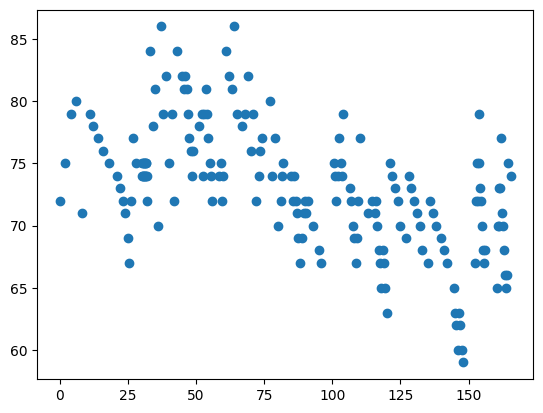

In [5]:
note = 0
beats = []
tones = []
for track in mid.tracks:
    beat = 0
    for msg in track:
        beat += msg.time / ticks_per_beat
        if((msg.type == 'note_on') and (note<371)):
            notes[note] = beat
            beats.append(beat)
            notes[note+1] = msg.note
            tones.append(msg.note)
            
            note += 2
print(notes)
import matplotlib.pyplot as plt
plt.scatter(beats, tones)
plt.show()

133


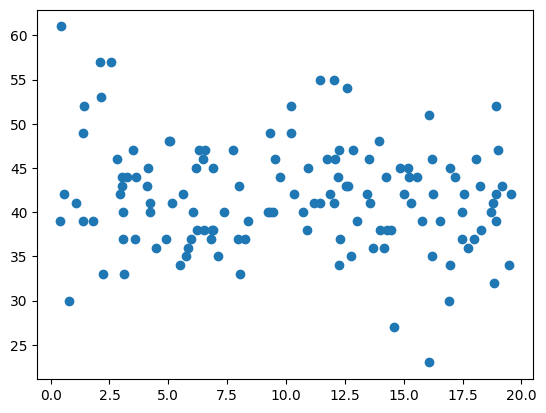

In [6]:
# ::::::::::::::: Random MIDI-Generator::::::::::::::
import random

tonalcenter = random.randint(33, 44) # Van A tot G# om alle toonsoorten te hebben.
rseq = np.zeros(shape=(256,1))
duration = 4 * random.randint(4, 8) # tussen 4 en 8 maten
n_notes = int(round(random.choices([1, 2, 3, 4, 5, 6, 7, 8, 9], [0.075, 0.255, 0.065, 0.25, 0.02, 0.06, 0.015, 0.245, 0.015])[0] * duration * 0.75 * 1.11))
# maal 0.75 omdat je gemiddeld driekwart gebruikt, bijv Jingle Bells: 3,0625 noten per vierkwartsmaat. +11% marge voor verwijderbare noten

rmoments = []
rtones = []
for rnote in range(0, n_notes):
    rmoments.append(random.uniform(0, duration))
    rtones.append(round(np.random.normal(loc=tonalcenter, scale=6)))
rmoments.sort()

print(len(rtones))
plt.scatter(rmoments, rtones)
plt.show()

In [7]:
rmid = mido.MidiFile()
track = mido.MidiTrack()
rmid.tracks.append(track)
tpb = 1680
rmid.ticks_per_beat = tpb

rest = 0
rnote = 0
for rnote in range(0, n_notes-1):
    if((rmoments[rnote+1]-rmoments[rnote])*tpb <= 840):
        track.append(mido.Message('note_on', channel=0, note=rtones[rnote], velocity=127, time=rest))
        track.append(mido.Message('note_off', channel=0, note=rtones[rnote], velocity=96, time=int(round((rmoments[rnote+1]-rmoments[rnote])*tpb))))
        rest = 0

    elif((rmoments[rnote+1]-rmoments[rnote])*tpb > 840):
        track.append(mido.Message('note_on', channel=0, note=rtones[rnote], velocity=127, time=rest))
        track.append(mido.Message('note_off', channel=0, note=rtones[rnote], velocity=96, time=840))
        rest = int(round((rmoments[rnote+1]-rmoments[rnote])*tpb-840))
        
track.append(mido.Message('note_on', channel=0, note=rtones[n_notes-1], velocity=127, time=rest))
track.append(mido.Message('note_off', channel=0, note=rtones[n_notes-1], velocity=96, time=840))    

track.append(mido.MetaMessage('end_of_track'))

rmid.save('random.mid')

In [8]:
def mid2vec(mid):
    # Bepaal tijdseenheden
    tempi = []
    for track in mid.tracks:
        for msg in track:
            if msg.type == 'set_tempo':
                tempi.append(msg.tempo)
    tempo = 500000
    if(len(tempi)>0):
        tempo = tempi[0]
    ticks_per_beat = mid.ticks_per_beat
    bpm = 60000000/tempo
    dt = 60 / (bpm * ticks_per_beat)

    # Maak vector met de noten
    notes = np.zeros(372)
    note = 0
    beats = []
    tones = []
    for track in mid.tracks:
        beat = 0
        for msg in track:
            beat += msg.time / ticks_per_beat
            if((msg.type == 'note_on') and (note<371)):
                notes[note] = beat
                beats.append(beat)
                notes[note+1] = msg.note
                tones.append(msg.note)
                note += 2

    return(notes)
print(mid2vec(mid))

[  0.          72.           2.          75.           4.
  79.           6.          80.           8.          71.
  11.          79.          12.          78.          14.
  77.          16.          76.          18.          75.
  21.          74.          22.          73.          23.
  72.          24.          71.          25.          69.
  25.5         67.          26.          72.          27.
  77.          28.          75.          30.          74.
  30.25        75.          30.375       74.          30.5
  75.          30.625       74.          30.75        75.
  30.875       74.          31.          75.          31.125
  74.          31.25        75.          31.375       74.
  31.5         75.          31.625       74.          31.75
  75.          31.875       74.          32.          72.
  33.          84.          34.          78.          35.
  81.          36.          70.          37.          86.
  38.          79.          39.          82.          40.
  75.   

In [9]:
def randombass():
    tonalcenter = random.randint(33, 44) # Van A tot G# om alle toonsoorten te hebben.
    rseq = np.zeros(shape=(256,1))
    duration = 4 * random.randint(4, 8) # tussen 4 en 8 maten
    n_notes = int(round(random.choices([1, 2, 3, 4, 5, 6, 7, 8, 9], [0.075, 0.255, 0.065, 0.25, 0.02, 0.06, 0.015, 0.245, 0.015])[0] * duration * 0.75 * 1.11))
    # maal 0.75 omdat je gemiddeld driekwart gebruikt, bijv Jingle Bells: 3,0625 noten per vierkwartsmaat. +11% marge voor verwijderbare noten
    
    rmoments = []
    rtones = []
    for rnote in range(0, n_notes):
        rmoments.append(random.uniform(0, duration))
        rtones.append(round(np.random.normal(loc=tonalcenter, scale=6)))
    rmoments.sort()

    rnote = 0
    rnotes = np.zeros(372)
    halfpos = 0
    while(rnote < 371 and halfpos < n_notes):
        rnotes[rnote] = rmoments[halfpos]
        rnotes[rnote+1] = rtones[halfpos]
        halfpos += 1
        rnote += 2
    return(rnotes)

In [10]:
print(randombass())

[ 0.06860308 36.          0.89270471 36.          1.13525111 55.
  2.02925298 40.          2.18670683 41.          2.31321723 40.
  2.66275204 23.          4.1178175  38.          4.2663897  39.
  4.71467408 32.          4.75057501 44.          4.76488998 43.
  5.18388065 37.          5.57072707 34.          5.60512898 46.
  5.91299146 41.          6.38858449 40.          7.16399046 34.
  7.49970635 32.          7.71367074 29.          7.82742344 36.
  8.8382775  34.          8.97249647 36.          9.41996524 31.
  9.65289913 26.          9.86402097 41.         10.00077437 42.
 10.21204749 43.         10.5234965  38.         11.09085102 32.
 11.66994418 34.         11.74793972 36.         11.79144909 34.
 12.81164636 40.         13.39470445 33.         14.69748818 36.
 14.96007908 46.         15.04398388 34.         15.11086485 30.
 15.42787107 39.         15.9434234  42.         16.32847928 41.
 16.39361702 37.         16.7958536  37.         17.11511464 39.
 17.44484774 42.         

In [11]:
# Import dataset
import os
directory = 'BASSmidis'

filepaths = []
for filename in os.scandir(directory):
    if filename.is_file():
        filepaths.append(filename.path)
print(filepaths)

['BASSmidis\\005 - deadmau5 bass.mid', 'BASSmidis\\006 - hardwell bass.mid', 'BASSmidis\\01 c minor bass.mid', 'BASSmidis\\01 c sharp bass.mid', 'BASSmidis\\01 dms ttl1 bass.mid', 'BASSmidis\\016 - paul van dyk bass.mid', 'BASSmidis\\017 - nicky romero bass.mid', 'BASSmidis\\019 bass.mid', 'BASSmidis\\01a sub bass.mid', 'BASSmidis\\02 c major bass.mid', 'BASSmidis\\02 dms ttl1 bass.mid', 'BASSmidis\\02 f bass.mid', 'BASSmidis\\02 g bass.mid', 'BASSmidis\\024 - dada life bass.mid', 'BASSmidis\\026 - fedde le grand bass.mid', 'BASSmidis\\029 - laidback luke bass.mid', 'BASSmidis\\02b flux bass.mid', 'BASSmidis\\02b nuke em bass.mid', 'BASSmidis\\02c flux bass.mid', 'BASSmidis\\02c nuke em bass.mid', 'BASSmidis\\03 d minor bass.mid', 'BASSmidis\\03 dms ttl1 bass.mid', 'BASSmidis\\034 bass.mid', 'BASSmidis\\035 - chuckie bass.mid', 'BASSmidis\\036 - zatox bass.mid', 'BASSmidis\\037 bass.mid', 'BASSmidis\\039 - cosmic gate bass.mid', 'BASSmidis\\03b neuro funk bass.mid', 'BASSmidis\\03b sub

In [12]:
dataset = []
for path in filepaths:
    mid = mido.MidiFile(path, clip=True)
    dataset.append(mid2vec(mid))

In [13]:
def adderror(notes):
    noteserr = np.copy(notes)
    n_notes = int(round(np.count_nonzero(noteserr)/2))
    dice = random.randint(1, 10)
    if(dice < 7):
        errpos = random.randint(0, n_notes - 1) * 2
        noteserr[errpos] += np.random.normal(loc=0, scale=1)
    else:
        errpos = random.randint(1, n_notes) * 2 - 1
        noteserr[errpos] += round(np.random.normal(loc=0, scale=6))
    return(noteserr)

In [14]:
# Genereer basslines met error

error1 = []
error1_2 = []
error1_3 = []
error1_4 = []
piece = 0
numpieces = len(dataset)
while(piece < numpieces):
    #print(filepaths[piece])
    error1.append(adderror(dataset[piece]))
    error1_2.append(adderror(dataset[piece]))
    error1_3.append(adderror(dataset[piece]))
    error1_4.append(adderror(dataset[piece]))
    piece += 1
piece = 0

In [15]:
def normalize(notes):
    note = 0
    while(note < 372):
        notes[note] *= 1/24 # gemiddeld aantal beats in een random-fragment
        notes[note+1] = (notes[note+1])/60 # Middle C = 1
        note += 2
    return(notes)

In [16]:
def denormalize(notes):
    note = 0
    while(note < 372):
        notes[note] *= 24 # gemiddeld aantal beats in een random-fragment
        notes[note+1] = int(round((notes[note+1])*60)) # Middle C = 60
        note += 2
    return(notes)

In [17]:
piece = 0
normalizeddata = np.copy(dataset)
normalizederror1 = np.copy(error1)
normalizederror1_2 = np.copy(error1_2)
normalizederror1_3 = np.copy(error1_3)
normalizederror1_4 = np.copy(error1_4)
while(piece < numpieces):
    normalizeddata[piece] = normalize(normalizeddata[piece])
    normalizederror1[piece] = normalize(normalizederror1[piece])
    normalizederror1_2[piece] = normalize(normalizederror1_2[piece])
    normalizederror1_3[piece] = normalize(normalizederror1_3[piece])
    normalizederror1_4[piece] = normalize(normalizederror1_4[piece])
    piece += 1

In [18]:
y = np.concatenate((normalizeddata, normalizeddata, normalizeddata, normalizeddata))
X = np.concatenate((normalizederror1, normalizederror1_2, normalizederror1_3, normalizederror1_4))

=== NEURAAL NET 1, TRAINEN OP 1 FOUT ===

In [19]:
import tensorflow as tf
import keras
from keras import layers

model = keras.Sequential()
model.add(layers.Dense(372, activation='sigmoid', input_shape=(372,)))
model.add(layers.Dense(372, activation='sigmoid'))
model.add(layers.Dense(372, activation='sigmoid'))
model.add(layers.Dense(372, activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 372)               138756    
                                                                 
 dense_1 (Dense)             (None, 372)               138756    
                                                                 
 dense_2 (Dense)             (None, 372)               138756    
                                                                 
 dense_3 (Dense)             (None, 372)               138756    
                                                                 
Total params: 555024 (2.12 MB)
Trainable params: 555024 (2.12 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss='huber', optimizer=opt, metrics='accuracy')
model.fit(X, y, batch_size=2, epochs=2, validation_split=0.1)

Epoch 1/2
6466/6466 [==============================] - 106s 16ms/step - loss: 31.0610 - accuracy: 0.0643 - val_loss: 0.0698 - val_accuracy: 0.0703
Epoch 2/2
6466/6466 [==============================] - 104s 16ms/step - loss: 31.0603 - accuracy: 0.0683 - val_loss: 0.0697 - val_accuracy: 0.0703


In [21]:
#model.save('Model1dropout2.keras')

In [22]:
model2 = keras.models.load_model('model1.keras')
noise = normalize(randombass())
n_notes = int(round(np.count_nonzero(noise)/2))
input = tf.expand_dims(noise, axis=0)
print(input)
cycle = 0
while(cycle < 1):
    input = model.predict(input)
    cycle += 1
output = input
print(output)

tf.Tensor(
[[6.58237241e-04 7.33333333e-01 2.08752999e-02 8.00000000e-01
  2.65777452e-02 7.16666667e-01 3.55388807e-02 5.33333333e-01
  4.46264796e-02 8.50000000e-01 4.65884174e-02 7.16666667e-01
  5.19260353e-02 5.66666667e-01 6.49936695e-02 7.16666667e-01
  6.99474617e-02 6.50000000e-01 7.66890045e-02 7.00000000e-01
  8.88238005e-02 7.50000000e-01 1.22596496e-01 7.50000000e-01
  1.41310578e-01 7.16666667e-01 1.45444794e-01 6.66666667e-01
  1.54738283e-01 5.66666667e-01 1.55354530e-01 8.83333333e-01
  1.77861040e-01 7.50000000e-01 1.80388128e-01 8.83333333e-01
  1.80859877e-01 6.33333333e-01 1.86946176e-01 6.83333333e-01
  2.18064016e-01 6.50000000e-01 2.22089099e-01 7.66666667e-01
  2.36071677e-01 7.50000000e-01 2.36967883e-01 8.33333333e-01
  2.38211432e-01 8.83333333e-01 2.78634488e-01 6.33333333e-01
  3.10552582e-01 5.16666667e-01 3.10950650e-01 5.83333333e-01
  3.26590407e-01 6.50000000e-01 3.28015675e-01 5.83333333e-01
  3.82222803e-01 5.16666667e-01 3.98186792e-01 7.16666667e-

In [23]:
print(output[0])
AInotes = denormalize(output[0])
print(output[0])
print(AInotes)

[2.13796869e-02 0.00000000e+00 6.18658811e-02 0.00000000e+00
 7.89595991e-02 0.00000000e+00 0.00000000e+00 7.68117011e-01
 1.29578456e-01 7.39660144e-01 0.00000000e+00 7.41693676e-01
 1.78425878e-01 7.19683707e-01 1.84147507e-01 0.00000000e+00
 1.85455814e-01 0.00000000e+00 0.00000000e+00 6.69400871e-01
 1.99172571e-01 6.35609388e-01 2.09471807e-01 6.25903368e-01
 0.00000000e+00 5.86088896e-01 0.00000000e+00 0.00000000e+00
 2.12015197e-01 5.77011943e-01 2.37291351e-01 5.58324754e-01
 0.00000000e+00 5.15615106e-01 2.16047749e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.22417697e-01 4.92408007e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.45910394e-01
 0.00000000e+00 0.00000000e+00 2.18740270e-01 4.26031083e-01
 0.00000000e+00 0.00000000e+00 2.04954267e-01 0.00000000e+00
 1.93684399e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.84375718e-01 0.00000000e+00 1.87867776e-01 3.32572937e-01
 1.90973863e-01 3.19039077e-01 1.89860284e-01 3.14082146e-01
 1.44750357e-01 2.479655

In [24]:
def notes2mid(notes):
    mid = mido.MidiFile()
    track = mido.MidiTrack()
    mid.tracks.append(track)
    tpb = 1680
    mid.ticks_per_beat = tpb

    points = []
    index = 0
    while(index < 372):
        if((notes[index+1] > 6) and (notes[index+1] < 128)):
            points.append([notes[index], notes[index+1]])
        index = index + 2

    print(len(points))
    index = 0
    points = sorted(points)
    n_notes = len(points)
    moments = []
    tones = []
    while(index < n_notes):
        moments.append(points[index][0])
        tones.append(points[index][1])
        index += 1
    
    rest = 0
    note = 0
    for note in range(0, n_notes-1):
        if((moments[note+1]-moments[note])*tpb <= 840):
            track.append(mido.Message('note_on', channel=0, note=int(tones[note]), velocity=127, time=rest))
            track.append(mido.Message('note_off', channel=0, note=int(tones[note]), velocity=96, time=int(round((moments[note+1]-moments[note])*tpb))))
            rest = 0
    
        elif((moments[note+1]-moments[note])*tpb > 840):
            track.append(mido.Message('note_on', channel=0, note=int(tones[note]), velocity=127, time=rest))
            track.append(mido.Message('note_off', channel=0, note=int(tones[note]), velocity=96, time=840))
            rest = int(round((moments[note+1]-moments[note])*tpb-840))
            
    track.append(mido.Message('note_on', channel=0, note=int(tones[n_notes-1]), velocity=127, time=rest))
    track.append(mido.Message('note_off', channel=0, note=int(tones[n_notes-1]), velocity=96, time=840))    
    
    track.append(mido.MetaMessage('end_of_track'))
    
    mid.save('AI1.mid')
    plt.scatter(moments, tones)
    plt.show()
    return("Saved AI1.mid")

38


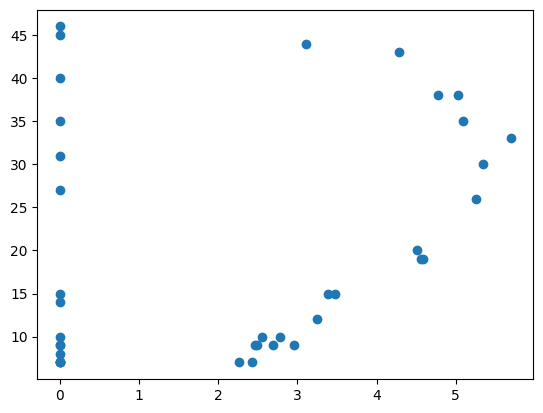

Saved AI1.mid


In [25]:
print(notes2mid(AInotes))